In [28]:
import pandas as pd
import numpy as np


df = pd.read_csv("Diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.fillna(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df2 = df[["Glucose", "BMI", "Age", "Outcome"]]
df2.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [10]:
df2.describe()

,Glucose,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,120.894531,31.992578,33.240885,0.348958
std,31.972618,7.884160,11.760232,0.476951
min,0.000000,0.000000,21.000000,0.000000
25%,99.000000,27.300000,24.000000,0.000000
50%,117.000000,32.000000,29.000000,0.000000
75%,140.250000,36.600000,41.000000,1.000000
max,199.000000,67.100000,81.000000,1.000000


In [11]:
df2[df2.columns[:-1]] == 0

,Glucose,BMI,Age
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
763,False,False,False
764,False,False,False
765,False,False,False
766,False,False,False


In [15]:
df3 = df2.loc[~(df2[df2.columns[:-1]] == 0).any(axis=1)]
df3.describe()

,Glucose,BMI,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000
mean,121.941489,32.454654,33.312500,0.351064
std,30.601198,6.928926,11.709395,0.477621
min,44.000000,18.200000,21.000000,0.000000
25%,99.750000,27.500000,24.000000,0.000000
50%,117.000000,32.300000,29.000000,0.000000
75%,141.000000,36.600000,41.000000,1.000000
max,199.000000,67.100000,81.000000,1.000000


In [16]:
df3.groupby("Outcome").mean()

,Glucose,BMI,Age
Outcome,,,
0,110.825820,30.876434,31.309426
1,142.488636,35.371970,37.015152


In [17]:
df3.groupby("Outcome").agg({"Glucose": "mean", "BMI": "median", "Age": "sum"})

,Glucose,BMI,Age
Outcome,,,
0,110.825820,30.10,15279
1,142.488636,34.25,9772


In [18]:
df3.groupby("Outcome").agg({"mean", "median"})

Glucose               BMI               Age       
               mean median       mean median       mean median
Outcome                                                       
0        110.825820  107.5  30.876434  30.10  31.309426     27
1        142.488636  140.5  35.371970  34.25  37.015152     36

In [20]:
positive = df3.loc[df3["Outcome"] == 1]
negative = df3.loc[df3["Outcome"] == 0]
print(positive.shape, negative.shape)

(264, 4) (488, 4)


In [21]:
df3.to_csv("clean_diabetes.csv", index=False)

(1010,) (1010, 2)


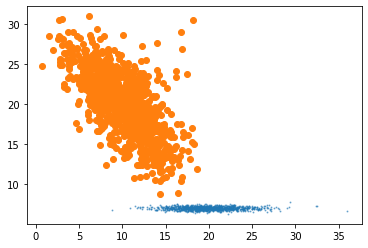

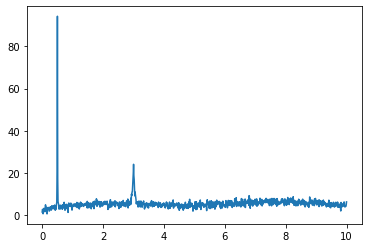

In [30]:
import matplotlib.pyplot as plt

df_1 = np.loadtxt("outlier_1d.txt")
df_2 = np.loadtxt("outlier_2d.txt")
df_3 = np.loadtxt("outlier_curve.txt")
print(df_1.shape, df_2.shape)

plt.scatter(df_1, np.random.normal(7, 0.2, size=df_1.size), s=1, alpha=0.5)
plt.scatter(df_2[:, 0], df_2[:, 1])
plt.show();
plt.plot(df_3[:, 0], df_3[:, 1])

Rejection-1006 points
z-score for 3 corresponds to a prob of0.27%


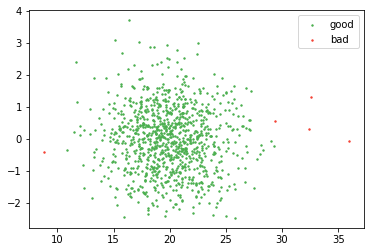

In [32]:
mean, std = np.mean(df_1), np.std(df_1)
z_score = np.abs((df_1 - mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection{~good.sum()} points")
from scipy.stats import norm
print(f"z-score for 3 corresponds to a prob of{100 * 2 * norm.sf(threshold):0.2f}%")

visual_scatter = np.random.normal(size=df_1.size)
plt.scatter(df_1[good], visual_scatter[good], s=2, label="good", color="#4CAF50")
plt.scatter(df_1[~good], visual_scatter[~good], s=2, label="bad", color="#F44336")
plt.legend();

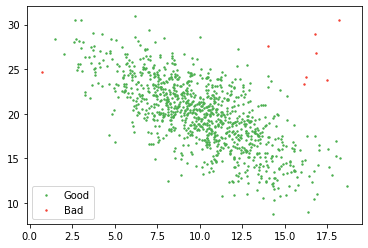

In [36]:
from scipy.stats import multivariate_normal as mn

mean, cov = np.mean(df_2, axis=0), np.cov(df_2.T)
good = mn(mean, cov).pdf(df_2) > 0.01 / 100

plt.scatter(df_2[good, 0], df_2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(df_2[~good, 0], df_2[~good, 1], s=2, label="Bad", color="#F44336")
plt.legend();